<a href="https://colab.research.google.com/github/Priyanshu7tiwary/ML/blob/main/productRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = pd.read_csv('/content/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv')
print(data.head())
print(data.tail())




                            Uniq Id  \
0  4c69b61db1fc16e7013b43fc926e502d   
1  66d49bbed043f5be260fa9f7fbff5957   
2  2c55cae269aebf53838484b0d7dd931a   
3  18018b6bc416dab347b1b7db79994afa   
4  e04b990e95bf73bbe6a3fa09785d7cd0   

                                        Product Name  Brand Name  Asin  \
0  DB Longboards CoreFlex Crossbow 41" Bamboo Fib...         NaN   NaN   
1  Electronic Snap Circuits Mini Kits Classpack, ...         NaN   NaN   
2  3Doodler Create Flexy 3D Printing Filament Ref...         NaN   NaN   
3  Guillow Airplane Design Studio with Travel Cas...         NaN   NaN   
4                   Woodstock- Collage 500 pc Puzzle         NaN   NaN   

                                            Category Upc Ean Code  List Price  \
0  Sports & Outdoors | Outdoor Recreation | Skate...          NaN         NaN   
1  Toys & Games | Learning & Education | Science ...          NaN         NaN   
2          Toys & Games | Arts & Crafts | Craft Kits          NaN         NaN

In [4]:
import re
import numpy as np

def convert_price(price):
    if isinstance(price, str):

        price = price.replace(" ", "").strip()


        matches = re.findall(r"\d+\.\d+|\d+", price)
        if matches:
            return float(matches[0])

    return np.nan


data["Selling Price"] = data["Selling Price"].apply(convert_price)

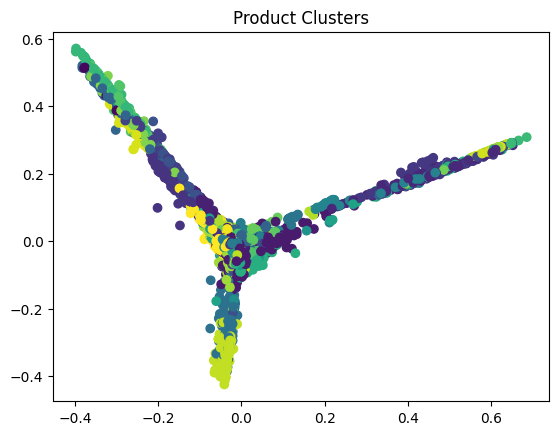

                               Uniq Id  \
7007  50d142369bcb2469c26231f96b372fb2   
4480  38fbd0ba72065d07da24455ff03e9f52   
1047  47bd8941a3f713a3b0db5fb8b8ddae16   
9906  bf2df81cb99869094923949c90f47e51   
5434  04e1436960dbddb8e43678f45db5fa5c   

                                           Product Name  cluster  
7007  American Educational Receptacle Plastic Disc w...       89  
4480  Steve Spangler's Glow in the Dark Slime - Atom...       89  
1047  Westcott Titanium Bonded Razor Paper Cutter, A...       89  
9906  NewPath Learning Social Studies Curriculum Mas...       89  
5434  Great Papers! Scroll Letterhead, 8.5"x11", 80 ...       89  


In [5]:
columns_to_drop = [ 'Brand Name', 'Asin', 'Upc Ean Code', 'List Price', 'Quantity',
    'Model Number', 'Product Url', 'Stock', 'Product Details', 'Dimensions',
    'Color', 'Ingredients', 'Direction To Use', 'Size Quantity Variant', 'Product Description'
]
data['combined_features'] = data['Product Name'] + " " + data['Category']

data['combined_features'] = data['combined_features'].fillna("")
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])


K = 100
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(tfidf_matrix)


data['cluster'] = kmeans.labels_


pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Product Clusters')
plt.show()


def recommend_products(product_id, num_recommendations=5):
    product_index = data[data['Uniq Id'] == product_id].index[0]
    product_cluster = data.loc[product_index, 'cluster']

    # Find other products in the same cluster
    cluster_products = data[data['cluster'] == product_cluster]

    # Exclude the given product
    cluster_products = cluster_products[cluster_products['Uniq Id'] != product_id]
    return cluster_products.sample(num_recommendations)

# Example: Recommend products similar to product with Uniq Id '4c69b61db1fc16e7013b43fc926e502d'
recommendations = recommend_products('c00301a38560da2abc89c1f86ce4b267')
print(recommendations[['Uniq Id', 'Product Name', 'cluster']])